In [8]:
import datetime

from model import *
from random_search import *
from grid_search import *
from experiment_helper import *
from bayesian_optimizer import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Optimization for Machine Learning

### Experiment 1: Gradient descent tuning

In [11]:
# fixed parameters
num_layers = 2
num_hidden = 100
num_epochs = 300
mini_batch_size=50

# variable parameters
lr_min, lr_max, lr_n = 0.0001, 1, 5
momentum_min, momentum_max, momentum_n = 0.0, 1.0, 10

# experiment parameters
seed = 0
num_trials = 50

#### Random search

In [ ]:
rd_res = []
for i in range(5):
    parameters_range = {'lr': (lr_min, lr_max, 'loguniform_10'),
                    'mini_batch_size': (mini_batch_size, mini_batch_size,  'fixed'),
                    'momentum': (momentum_min, momentum_max,  'uniform'),
                    'num_hidden': (num_hidden, num_hidden, 'fixed'),
                    'num_layers': (num_layers, num_layers, 'fixed'),
                    'num_epochs': (num_epochs, num_epochs, 'fixed')}
    parameters = random_hyperparameters(parameters_range,num_trials, i)
    rd_results = random_search(parameters)
    rd_res.append(rd_results)

#### Grid search

In [14]:
parameters_range = {'momentum': (momentum_min, momentum_max, momentum_n, 'linspace'),
                    'lr': (lr_min, lr_max, lr_n, 'logspace_10'),
                    'mini_batch_size': (mini_batch_size, mini_batch_size, 1, 'fixed'),
                    'num_hidden': (num_hidden, num_hidden, 1, 'fixed'),
                    'num_layers': (num_layers, num_layers, 1, 'fixed'),
                    'num_epochs': (num_epochs, num_epochs, 1, 'fixed')}
parameters = grid_hyperparameters(parameters_range)
gd_results = grid_search(parameters)

#### Bayesian optimisation

In [15]:
bo_res = []
for i in range(5):
    try :
        parameters_range = {'lr': (lr_min, lr_max, lr_n, 'logspace_10'),
                    'mini_batch_size': (50, 50, 1, 'fixed'),
                    'momentum': (momentum_min, momentum_max, momentum_n, 'linspace'),
                    'num_hidden': (num_hidden, num_hidden, 1, 'fixed'),
                    'num_layers': (num_layers, num_layers, 1, 'fixed'),
                    'num_epochs': (num_epochs, num_epochs, 1, 'fixed')}
        bo_optimizer = TuneBO( parameters_range=parameters_range)
        bo_optimizer.run(num_evals=50)
        bo_results = bo_optimizer.evaluation_history
        bo_res.append(bo_results)
    except BaseException:
        print('exception')

 C:\Users\Doo\anaconda3\lib\site-packages\paramz\transformations.py:111: RuntimeWarning:overflow encountered in expm1
 C:\Users\Doo\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:243: RuntimeWarning:invalid value encountered in true_divide
 C:\Users\Doo\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\Doo\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


exception


 C:\Users\Doo\PycharmProjects\Opt_ML_course_project\bayesian_optimizer.py:232: RuntimeWarning:invalid value encountered in sqrt
 C:\Users\Doo\PycharmProjects\Opt_ML_course_project\bayesian_optimizer.py:234: RuntimeWarning:invalid value encountered in sqrt


exception


#### Comparison

[ 20  40  60  80 100 120 140 160 180 200 220 240 260 280 300 320 340 360
 380 400 420 440 460 480 500 520 540 560 580 600]


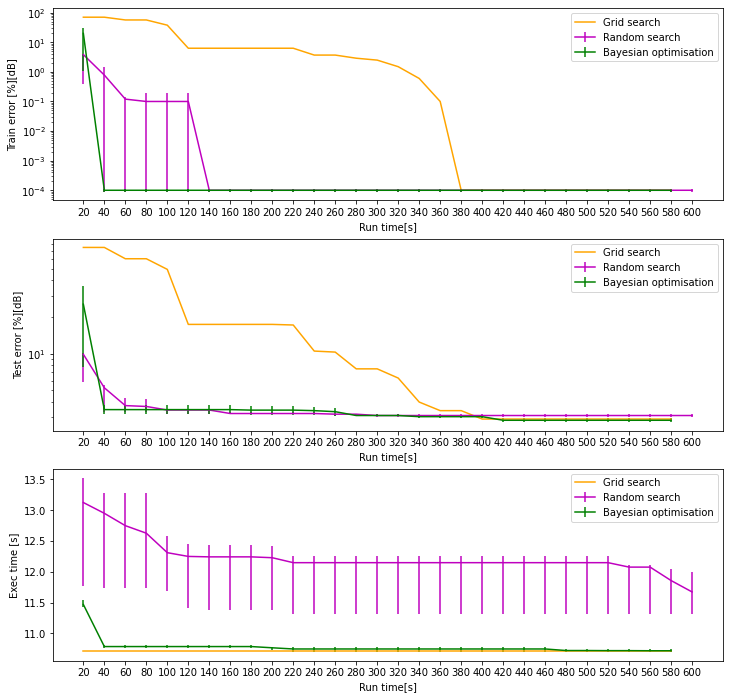

In [42]:
plot_all_results(rd_res, [gd_results], bo_res)